# Libraries

In [1]:
# !pip install tensorflow-addons
# !pip3 install kagglehub

# #Installing Qiskit Packages
# !pip install qiskit
# !pip install qiskit_machine_learning
# !pip install qiskit_algorithms
# !pip install qiskit_ibm_runtime

In [52]:
from pathlib import Path
# import tensorflow as tf
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import requests
import seaborn as sns

#Importing Libraries
from sklearn.svm import SVC
from sklearn.metrics.pairwise import rbf_kernel

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.library import ZZFeatureMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
import numpy as np

from sklearn.cluster import SpectralClustering
from sklearn.metrics import normalized_mutual_info_score

#from qiskit.utils import algorithm_globals
from qiskit.circuit.library import PauliFeatureMap, ZZFeatureMap
from qiskit_algorithms.state_fidelities import ComputeUncompute
from qiskit_machine_learning.kernels import FidelityQuantumKernel

from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_machine_learning.algorithms.classifiers import QSVC
from qiskit.circuit import QuantumCircuit
from qiskit import transpile
from qiskit.circuit.library import RealAmplitudes
from qiskit_algorithms.optimizers import COBYLA
from qiskit.primitives import BaseSampler
#from qiskit.primitives import Sampler
#from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, SamplerV2
from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler

from sklearn.pipeline import make_pipeline
from qiskit_machine_learning.state_fidelities import ComputeUncompute
from qiskit.circuit.library import ZZFeatureMap, RealAmplitudes
from qiskit_machine_learning.kernels import FidelityQuantumKernel
from qiskit import transpile

from sklearn.svm import SVC
import pandas as pd
import time

import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

np.random.seed(42)
#algorithm_globals.random_seed = 123

# Dataset

[ClaMp](https://www.kaggle.com/code/ssmohanty/dimensionality-reduction-techniques)

In [3]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("saurabhshahane/classification-of-malwares")

# print("Path to dataset files:", path)

In [4]:
import pandas as pd
import os

# Define the dataset path
dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

# List files in the directory to find the CSV file
files = os.listdir(dataset_path)
csv_files = [f for f in files if f.endswith('.csv')]

# Load the first CSV file (assuming there's only one)
if csv_files:
    df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
    print("CSV found and send to df")  # Display first few rows
else:
    print("No CSV file found in the dataset directory.")

#/home/ats852/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1

CSV found and send to df


In [5]:
df.head()

,e_magic,e_cblp,e_cp,e_crlc,e_cparhdr,e_minalloc,e_maxalloc,e_ss,e_sp,e_csum,...,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,class
0,23117,144,3,0,4,0,65535,0,184,0,...,1194954,3,64,1048576,4096,1048576,4096,0,16,0
1,23117,144,3,0,4,0,65535,0,184,0,...,0,2,0,1048576,4096,1048576,4096,0,16,0
2,23117,144,3,0,4,0,65535,0,184,0,...,67688,2,320,1048576,4096,1048576,4096,0,16,0
3,23117,144,3,0,4,0,65535,0,184,0,...,113668,2,1344,1048576,4096,1048576,4096,0,16,0
4,23117,144,3,0,4,0,65535,0,184,0,...,69089,2,33088,262144,8192,1048576,4096,0,16,0


In [6]:
target = 'class'

In [7]:
import pandas as pd

def create_balanced_sample(df, target_column='class', num_samples=1000):
    # Ensure that num_samples is even to allow 50/50 split
    if num_samples % 2 != 0:
        raise ValueError("Number of samples must be even to ensure 50% distribution of labels.")

    # Split the data into two groups: one for each class
    class_0 = df[df[target_column] == 0]
    class_1 = df[df[target_column] == 1]
    
    # Find the minimum number of samples between the two classes to avoid imbalance issues
    min_class_size = min(len(class_0), len(class_1))
    
    if min_class_size * 2 < num_samples:
        raise ValueError(f"Not enough data to create a balanced dataset of {num_samples} samples.")

    # Sample from each class to ensure 50/50 split
    half_samples = num_samples // 2
    class_0_sample = class_0.sample(n=half_samples)
    class_1_sample = class_1.sample(n=half_samples)
    
    # Concatenate the two samples to form the balanced dataset
    df_n = pd.concat([class_0_sample, class_1_sample]).sample(frac=1).reset_index(drop=True)  # Shuffle and reset index
    
    return df_n

# Usage
df = df.drop(columns=["e_magic", "e_crlc"])
y = df[target]
X = df.drop(columns=[target])

# Create balanced sample
df_n = create_balanced_sample(df)
print(df_n.shape)

(1000, 54)


In [8]:
print(df.isna().sum())

e_cblp                            0
e_cp                              0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          5184
e_oemid                           0
e_oeminfo                         0
e_res2                         5184
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion                0
MinorLinkerVersion                0
SizeOfCode                  

In [9]:
#df.dropna(axis=1, inplace=True)
df_cleaned = df.dropna(axis=1)
print(df.isna().sum())

e_cblp                            0
e_cp                              0
e_cparhdr                         0
e_minalloc                        0
e_maxalloc                        0
e_ss                              0
e_sp                              0
e_csum                            0
e_ip                              0
e_cs                              0
e_lfarlc                          0
e_ovno                            0
e_res                          5184
e_oemid                           0
e_oeminfo                         0
e_res2                         5184
e_lfanew                          0
Machine                           0
NumberOfSections                  0
CreationYear                      0
PointerToSymbolTable              0
NumberOfSymbols                   0
SizeOfOptionalHeader              0
Characteristics                   0
Magic                             0
MajorLinkerVersion                0
MinorLinkerVersion                0
SizeOfCode                  

In [10]:
y = df[target]
X = df.drop(columns=[target])
correlation_matrix = df.corr()

In [11]:
print("X shape = ", X.shape)
print("Y shape = ", y.shape)
y.value_counts()

X shape =  (5184, 53)
Y shape =  (5184,)


class
1    2683
0    2501
Name: count, dtype: int64

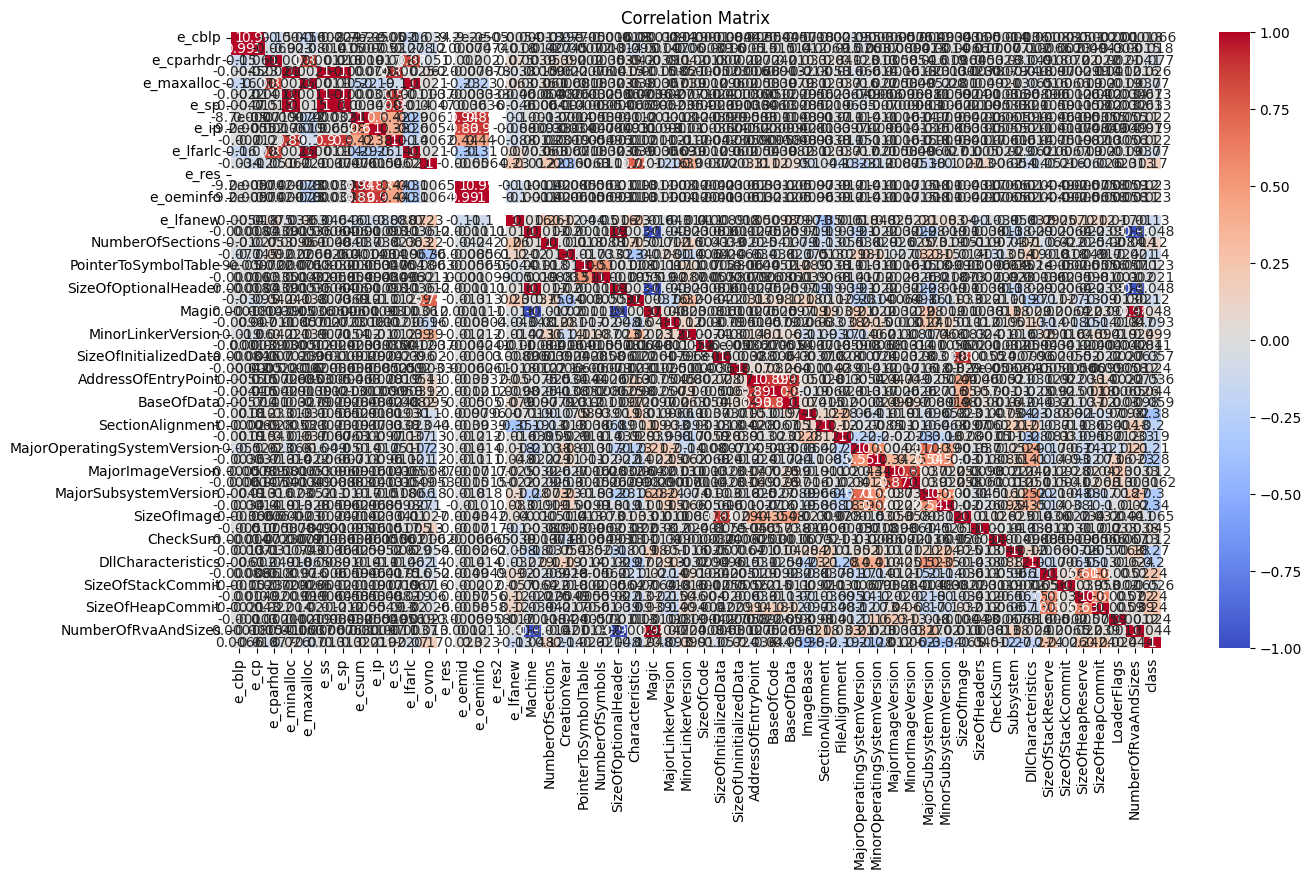

In [12]:
# Plot the correlation matrix using seaborn
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

In [13]:
class_correlations = correlation_matrix[target].sort_values(ascending=False)
all_list_atributs = correlation_matrix[target].sort_values(ascending=False).index.tolist()
list_atributs = all_list_atributs[1:]

# Display the sorted correlations
print(class_correlations)
print(list_atributs)

class                          1.000000
SizeOfStackReserve             0.243861
SizeOfHeapCommit               0.235746
SizeOfHeapReserve              0.235153
e_ovno                         0.170040
NumberOfSections               0.124798
MinorLinkerVersion             0.099256
Magic                          0.047762
SizeOfHeaders                  0.044557
NumberOfRvaAndSizes            0.044198
BaseOfCode                     0.043556
e_minalloc                     0.025531
SizeOfUninitializedData        0.024442
LoaderFlags                    0.023528
e_oemid                        0.023233
e_oeminfo                      0.023043
e_cs                           0.022322
e_csum                         0.021903
e_ip                           0.019424
e_ss                           0.013411
e_sp                           0.012614
CheckSum                       0.012330
MajorImageVersion              0.012285
SizeOfCode                     0.011383
e_cblp                         0.006623


In [14]:
class ClaMPDataset(): # 4 features -> most corelated atributs
  def __init__(self, target, cut = 0):
    self.target = target
    self.X, self.y, self.correlation_matrix = self.read_csv(cut)
    self.list_atributs = self.list_atributs_corralation()

  def list_atributs_corralation(self):
    # Unstack the correlation matrix to get pair-wise correlations as a series
    correlation_series = self.correlation_matrix.unstack()
    # Convert the series to a DataFrame for better manipulation
    correlation_df = pd.DataFrame(correlation_series, columns=['correlation']).reset_index()
    # Rename the columns for clarity
    correlation_df.columns = ['attribute_1', 'attribute_2', 'correlation']
    # Filter out self-correlations (where correlation == 1)
    correlation_df = correlation_df[correlation_df['attribute_1'] != correlation_df['attribute_2']]
    # Sort the correlation values from highest to lowest
    sorted_correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
    # List to store the final results without repeated attributes
    top_correlations = []
    list_atributs = []
    used_attributes = set()
    for _, row in sorted_correlation_df.iterrows():
        if len(top_correlations) >= 8:
            break
        attr1, attr2, corr_value = row['attribute_1'], row['attribute_2'], row['correlation']
        if attr1 not in used_attributes and attr2 not in used_attributes:
            top_correlations.append((attr1, attr2, corr_value))
            list_atributs.append(attr1)
            list_atributs.append(attr2)
            used_attributes.add(attr1)
            used_attributes.add(attr2)
    return list_atributs

  def read_csv(self, cut):
    # Define the dataset path
    dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

    # List files in the directory to find the CSV file
    files = os.listdir(dataset_path)
    csv_files = [f for f in files if f.endswith('.csv')]

    # Load the first CSV file (assuming there's only one)
    if csv_files:
        df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
        #print("CSV found and send to df")  # Display first few rows
    else:
        print("No CSV file found in the dataset directory.")
    #df.dropna(axis=1, inplace=True)
    df = df.dropna(axis=1)
    df = self.create_cut(df, cut)
    y = df[self.target]
    X = df.drop(columns=[self.target])
    correlation_matrix = X.corr()
    return X,y,correlation_matrix

  def create_cut(self, df, cut=0):
    if cut == 0:
        return df

    # Select the rows where Class is 0 and 1
    class_0 = df[df[self.target] == 0]
    class_1 = df[df[self.target] == 1]
    
    # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
    if cut % 2 == 0:
      df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
    else:
      df_n = pd.concat([class_0[:(cut//2)+1], class_1[:cut//2]])

    return df_n

  def plot_correlation_matrix(self):
    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(15, 8))
    sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
  def dataset(self, dimension):
    list_atributs = self.list_atributs
    X_dim = self.X[list_atributs[:dimension]]
    X_train, X_test, y_train, y_test = train_test_split(X_dim, self.y, test_size=0.2, random_state=42)
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [15]:
class ClaMPDatasetGPT(): # 4 features -> most and least correlated atributs
    def __init__(self, target, cut=0):
        self.target = target
        self.X, self.y, self.correlation_matrix = self.read_csv(cut)
        self.list_atributs = self.list_atributs_correlation()

    def list_atributs_correlation(self):
        # Calculate the correlation of each feature with the target variable
        target_correlation = self.X.corrwith(self.y).abs()
        
        # Sort the features based on their absolute correlation with the target
        sorted_correlation = target_correlation.sort_values(ascending=False)
        
        # Select the top n features with the highest correlation
        top_n = 15  # You can adjust this number as needed
        top_correlated = sorted_correlation.head(top_n).index.tolist()
        
        # Select the top n features with the lowest correlation
        bottom_correlated = sorted_correlation.tail(top_n).index.tolist()
        
        # Combine the lists
        list_atributs = top_correlated + bottom_correlated
        
        return list_atributs

    def read_csv(self, cut):
        # Define the dataset path
        dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

        # List files in the directory to find the CSV file
        files = os.listdir(dataset_path)
        csv_files = [f for f in files if f.endswith('.csv')]

        # Load the first CSV file (assuming there's only one)
        if csv_files:
            df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
            #print("CSV found and send to df")  # Display first few rows
        else:
            print("No CSV file found in the dataset directory.")
        
        # Drop columns with NaN values
        df = df.dropna(axis=1)
        # Apply the cut if specified
        df = self.create_cut(df, cut)
        
        # Separate features and target
        y = df[self.target]
        X = df.drop(columns=[self.target])
        
        # Calculate the correlation matrix
        correlation_matrix = X.corr()
        
        return X, y, correlation_matrix

    def create_cut(self, df, cut=0):
        if cut == 0:
            return df

        # Select the rows where Class is 0 and 1
        class_0 = df[df[self.target] == 0]
        class_1 = df[df[self.target] == 1]
        
        # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
        if cut % 2 == 0:
            df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
        else:
            df_n = pd.concat([class_0[:(cut//2)+1], class_1[:cut//2]])

        return df_n

    def plot_correlation_matrix(self):
        # Plot the correlation matrix using seaborn
        plt.figure(figsize=(15, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

    def dataset(self, dimension):
        list_atributs = self.list_atributs
        X_dim = self.X[list_atributs[:dimension]]
        X_train, X_test, y_train, y_test = train_test_split(X_dim, self.y, test_size=0.2, random_state=42)
        #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        return X_train, X_test, y_train, y_test

In [16]:
class ClaMPDataset_(): # 4 features -> most corelated atributs
  def __init__(self, target, cut = 0):
    self.target = target
    self.X, self.y, self.correlation_matrix = self.read_csv(cut)
    self.list_atributs = self.list_atributs_corralation()

  def list_atributs_corralation(self):
    # Unstack the correlation matrix to get pair-wise correlations as a series
    correlation_series = self.correlation_matrix.unstack()
    # Convert the series to a DataFrame for better manipulation
    correlation_df = pd.DataFrame(correlation_series, columns=['correlation']).reset_index()
    # Rename the columns for clarity
    correlation_df.columns = ['attribute_1', 'attribute_2', 'correlation']
    # Filter out self-correlations (where correlation == 1)
    correlation_df = correlation_df[correlation_df['attribute_1'] != correlation_df['attribute_2']]
    # Sort the correlation values from highest to lowest
    sorted_correlation_df = correlation_df.sort_values(by='correlation', ascending=False)
    # List to store the final results without repeated attributes
    top_correlations = []
    list_atributs = []
    used_attributes = set()
    for _, row in sorted_correlation_df.iterrows():
        if len(top_correlations) >= 8:
            break
        attr1, attr2, corr_value = row['attribute_1'], row['attribute_2'], row['correlation']
        if attr1 not in used_attributes and attr2 not in used_attributes:
            top_correlations.append((attr1, attr2, corr_value))
            list_atributs.append(attr1)
            list_atributs.append(attr2)
            used_attributes.add(attr1)
            used_attributes.add(attr2)
    return list_atributs

  def read_csv(self, cut):
    # Define the dataset path
    dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

    # List files in the directory to find the CSV file
    files = os.listdir(dataset_path)
    csv_files = [f for f in files if f.endswith('.csv')]

    # Load the first CSV file (assuming there's only one)
    if csv_files:
        df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
        #print("CSV found and send to df")  # Display first few rows
    else:
        print("No CSV file found in the dataset directory.")
    #df.dropna(axis=1, inplace=True)
    df = df.dropna(axis=1)
    df = self.create_cut(df, cut)
    y = df[self.target]
    X = df.drop(columns=[self.target])
    correlation_matrix = X.corr()
    return X,y,correlation_matrix

  def create_cut(self, df, cut=0):
    if cut == 0:
        return df

    # Select the rows where Class is 0 and 1
    class_0 = df[df[self.target] == 0]
    class_1 = df[df[self.target] == 1]
    
    # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
    if cut % 2 == 0:
      df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
    else:
      df_n = pd.concat([class_0[:(cut//2)+1], class_1[:cut//2]])
    return df_n

  def plot_correlation_matrix(self):
    # Plot the correlation matrix using seaborn
    plt.figure(figsize=(15, 8))
    sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()

  def stratified_ordered_split(self, X_dim, test_size=0.2):
    # Ensure index alignment
    X_class_0 = X_dim.loc[self.y[self.y == 0].index]
    X_class_1 = X_dim.loc[self.y[self.y == 1].index]
    y_class_0 = self.y[self.y == 0]
    y_class_1 = self.y[self.y == 1]

    # Split each class separately
    X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
        X_class_0, y_class_0, test_size=test_size, shuffle=False
    )
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
        X_class_1, y_class_1, test_size=test_size, shuffle=False
    )

    # Concatenate to maintain order
    X_train = np.vstack((X_train_0, X_train_1))
    X_test = np.vstack((X_test_0, X_test_1))
    y_train = np.hstack((y_train_0, y_train_1))
    y_test = np.hstack((y_test_0, y_test_1))

    return X_train, X_test, y_train, y_test

  def dataset(self, dimension):
    list_atributs = self.list_atributs
    X_dim = self.X[list_atributs[:dimension]]
    X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, test_size=0.2)
    #X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, self.y, test_size=0.2)
    #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    return X_train, X_test, y_train, y_test

In [17]:
class ClaMPDatasetGPT_(): # 4 features -> most and least correlated atributs
    def __init__(self, target, cut=0):
        self.target = target
        self.X, self.y, self.correlation_matrix = self.read_csv(cut)
        self.list_atributs = self.list_atributs_correlation()

    def list_atributs_correlation(self):
        # Calculate the correlation of each feature with the target variable
        target_correlation = self.X.corrwith(self.y).abs()
        
        # Sort the features based on their absolute correlation with the target
        sorted_correlation = target_correlation.sort_values(ascending=False)
        
        # Select the top n features with the highest correlation
        top_n = 15  # You can adjust this number as needed
        top_correlated = sorted_correlation.head(top_n).index.tolist()
        
        # Select the top n features with the lowest correlation
        bottom_correlated = sorted_correlation.tail(top_n).index.tolist()
        
        # Combine the lists
        list_atributs = top_correlated + bottom_correlated
        
        return list_atributs

    def read_csv(self, cut):
        # Define the dataset path
        dataset_path = "/Users/sthefaniepasso/.cache/kagglehub/datasets/saurabhshahane/classification-of-malwares/versions/1"

        # List files in the directory to find the CSV file
        files = os.listdir(dataset_path)
        csv_files = [f for f in files if f.endswith('.csv')]

        # Load the first CSV file (assuming there's only one)
        if csv_files:
            df = pd.read_csv(os.path.join(dataset_path, csv_files[0]))
            #print("CSV found and send to df")  # Display first few rows
        else:
            print("No CSV file found in the dataset directory.")
        
        # Drop columns with NaN values
        df = df.dropna(axis=1)
        # Apply the cut if specified
        df = self.create_cut(df, cut)
        
        # Separate features and target
        y = df[self.target]
        X = df.drop(columns=[self.target])
        
        # Calculate the correlation matrix
        correlation_matrix = X.corr()
        
        return X, y, correlation_matrix

    def create_cut(self, df, cut=0):
        if cut == 0:
            return df

        # Select the rows where Class is 0 and 1
        class_0 = df[df[self.target] == 0]
        class_1 = df[df[self.target] == 1]
        
        # Select based on the condition of cut % 2 == 0 or cut % 2 == 1
        if cut % 2 == 0:
            df_n = pd.concat([class_0[:cut//2], class_1[:cut//2]])
        else:
            df_n = pd.concat([class_0[:(cut//2)+1], class_1[:cut//2]])

        return df_n

    def plot_correlation_matrix(self):
        # Plot the correlation matrix using seaborn
        plt.figure(figsize=(15, 8))
        sns.heatmap(self.correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
        plt.title('Correlation Matrix')
        plt.show()

    def stratified_ordered_split(self, X_dim, test_size=0.2):
        # Ensure index alignment
        X_class_0 = X_dim.loc[self.y[self.y == 0].index]
        X_class_1 = X_dim.loc[self.y[self.y == 1].index]
        y_class_0 = self.y[self.y == 0]
        y_class_1 = self.y[self.y == 1]

        # Split each class separately
        X_train_0, X_test_0, y_train_0, y_test_0 = train_test_split(
            X_class_0, y_class_0, test_size=test_size, shuffle=False
        )
        X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(
            X_class_1, y_class_1, test_size=test_size, shuffle=False
        )

        # Concatenate to maintain order
        X_train = np.vstack((X_train_0, X_train_1))
        X_test = np.vstack((X_test_0, X_test_1))
        y_train = np.hstack((y_train_0, y_train_1))
        y_test = np.hstack((y_test_0, y_test_1))

        return X_train, X_test, y_train, y_test

    def dataset(self, dimension):
        list_atributs = self.list_atributs
        X_dim = self.X[list_atributs[:dimension]]
        X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, test_size=0.2)
        #X_train, X_test, y_train, y_test = self.stratified_ordered_split(X_dim, self.y, test_size=0.2)
        #print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        return X_train, X_test, y_train, y_test

# Quantum Backends


In [18]:
def backends(print_backend=False):  
  # Use this command if you didn't save your credentials:
  service = QiskitRuntimeService(channel="ibm_quantum", token="482cfbd6dec57e562dd79640807643b60b7388db6a0ff63e30b4bd92d4d55601a902c6f005413b8a69f6677daf23c82fa14626594ab3656d9c8c0e9229f920de")
  # Load saved credentials
  all = service.backends()
  quantum_backend = ""
  q_hardwares = []
  for i in range(0,len(all)):
    quantum_backend = str(all[i])
    if "<IBMBackend('ibm" in quantum_backend:
      quantum_backend = re.search(r"'(.*?)'", quantum_backend).group(1)  # Extract the text within single quotes
      q_hardwares.append(quantum_backend)
      if (print_backend==True):
        print("Quantum backend:", quantum_backend)
      #break
  return q_hardwares, service

## Metrics of Evaluation

We should ahve metrics of evaluation to the Quantum Machine Learning and also the Quantum Hardware with the [backend atributs](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.IBMBackend). So with this atribust we will be able to characterize the quantum computers.

In [19]:
def get_confusion_matrix_elements(test_labels, predictions):
    TP = np.sum((test_labels == 1) & (predictions == 1))
    TN = np.sum((test_labels == 0) & (predictions == 0))
    FP = np.sum((test_labels == 0) & (predictions == 1))
    FN = np.sum((test_labels == 1) & (predictions == 0))
    return TP, TN, FP, FN

def mean_qubits(backend, property):
  mean = 0
  for i in range(0,backend.num_qubits):
    if(property == 'readout_error'):
      mean += backend.properties().readout_error(i)
    elif(property=='t1'):
      mean += backend.properties().t2(0)
    elif(property=='t2'):
      mean += backend.properties().t2(0)
  mean=mean/backend.num_qubits
  return mean

def json_qiskit(name):
  TOKEN = "482cfbd6dec57e562dd79640807643b60b7388db6a0ff63e30b4bd92d4d55601a902c6f005413b8a69f6677daf23c82fa14626594ab3656d9c8c0e9229f920de"

  response = requests.request(
    "GET",
    "https://api.quantum-computing.ibm.com/runtime/workloads/me",
    headers={
        "Accept": "application/json",
        "Authorization": "Bearer "+TOKEN
    },
    )
  # Parse the JSON response
  usage_seconds = 0
  estimated_running_time_seconds = 0
  data = response.json()
  # Iterate over the 'workloads' list to find the latest backend with the name
  for workload in data['workloads']:
    if workload['backend'] == name:
          usage_seconds = workload.get('usage_seconds', None)
          estimated_running_time_seconds = workload.get('estimated_running_time_seconds', None)
          break
    else:
        #print(f"Backend {name} not found in the workloads.")
        continue
  return usage_seconds, estimated_running_time_seconds

def calculate_h_m_s_ms(end, start):
  # Calculate elapsed time in seconds
  elapsed_time_seconds = end - start
  # Convert elapsed time into hours, minutes, seconds
  hours = int(elapsed_time_seconds // 3600)
  minutes = int((elapsed_time_seconds % 3600) // 60)
  seconds = int(elapsed_time_seconds % 60)
  milliseconds = int((elapsed_time_seconds - int(elapsed_time_seconds)) * 1000)
  return elapsed_time_seconds#[hours, minutes, seconds, milliseconds]

# Define evaluation metric functions
def calculate_metrics(test_labels, predictions):
    TP, TN, FP, FN = get_confusion_matrix_elements(test_labels, predictions)
    accuracy = (TP + TN) / (TP + TN + FP + FN) if (TP + TN + FP + FN) > 0 else 0
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0 #recall=sensitivity
    sensitivity = recall
    specificity = TN / (TN + FP) if (TN + FP) > 0 else 0
    # calculate sensitivity and specificity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    return TP, TN, FP, FN, accuracy, precision, sensitivity, specificity, f1_score

def calculate_metrics_hardware(backend):
  #Read the json according to the backend you are using and get the: 'usage_seconds', 'estimated_running_time_seconds'
  usage_seconds, estimated_running_time_seconds = json_qiskit(backend.name)
  mean_readout_error = mean_qubits(backend,'readout_error')
  mean_t1 = mean_qubits(backend,'t1')
  mean_t2 = mean_qubits(backend,'t1')

  return usage_seconds, estimated_running_time_seconds,mean_readout_error, mean_t1, mean_t2


In [20]:
# Create an empty DataFrame with specified columns
df_results = pd.DataFrame({
    'Model': [],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity': [],
    'Specificity': [],
    'F1 Score': [],
    'Elapsed Time (s)':[],
    'Usage (s)':[],
    'Estimated Usage (s)': [],
    'Num Qubits': [],
    'Median T1':[],
    'Median T2':[],
    'Median Read Out Error':[]
})
df_results

,Model,TP,TN,FP,FN,Accuracy,Precision,Sensitivity,Specificity,F1 Score,Elapsed Time (s),Usage (s),Estimated Usage (s),Num Qubits,Median T1,Median T2,Median Read Out Error


In [31]:
def inicial_df():
  df_results = pd.DataFrame({
    'Hardware': [],
    'Dimension': [],
    'TP': [],
    'TN': [],
    'FP': [],
    'FN': [],
    'Accuracy': [],
    'Precision': [],
    'Sensitivity': [],
    'Specificity': [],
    'F1 Score': [],
    'Elapsed Time (s)':[],
    'Usage (s)':[],
    'Estimated Usage (s)': [],
    'Num Qubits': [],
    'Median T1':[],
    'Median T2':[],
    'Median Read Out Error':[]
  })
  return df_results

def metrics_of_evaluation(name, dimension, predicted_labels,end,start,test_features, test_labels, backend):
  usage_seconds, estimated_running_time_seconds,mean_readout_error, mean_t1, mean_t2 = calculate_metrics_hardware(backend)
  enlapse_time = end-start
  predictions = predicted_labels#qsvc.predict(test_features)
  TP, TN, FP, FN, accuracy, precision, sensitivity, specificity, f1_score = calculate_metrics(test_labels, predictions)

  # Create a DataFrame to store the results
  df_results = pd.DataFrame({
      'Hardware':name,
      'Dimension':dimension,
      'TP': [TP],
      'TN': [TN],
      'FP': [FP],
      'FN': [FN],
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Sensitivity': [sensitivity],
      'Specificity': [specificity],
      'F1 Score': [f1_score],
      'Elapsed Time (s)': [enlapse_time],
      'Usage (s)':[usage_seconds],
      'Estimated Usage (s)': [estimated_running_time_seconds],
      'Num Qubits': [backend.num_qubits],
      'Median T1':[mean_t1],
      'Median T2':[mean_t2],
      'Median Read Out Error':[mean_readout_error]

  })
  return df_results

def metrics_of_evaluation_classicaly(svc,dimension,end,start,test_features, test_labels):
  predictions = svc.fit_predict(test_features)
  TP, TN, FP, FN, accuracy, precision, sensitivity, specificity, f1_score = calculate_metrics(test_labels, predictions)
  usage_time = end-start
  # Create a DataFrame to store the results
  df_results = pd.DataFrame({
      'Dimension':dimension,
      'TP': [TP],
      'TN': [TN],
      'FP': [FP],
      'FN': [FN],
      'Accuracy': [accuracy],
      'Precision': [precision],
      'Sensitivity': [sensitivity],
      'Specificity': [specificity],
      'F1 Score': [f1_score],
      'Elapsed Time (s)': [usage_time],
      'Usage (s)':[usage_time],


  })
  return df_results

def should_skip_execution(results_file, samples, start_at):
    if os.path.exists(results_file):
        df_existing = pd.read_csv(results_file)
        # If there are existing records with the same sample count and dimensions greater than or equal to start_at, return True
        if ((df_existing["Samples"] == samples) & (df_existing["Dimension"] >= start_at)).any():
            return True
    
    return False

# Feature Extractions

### Quantum Clustering Model Method

In [45]:
def qsc(name, X_train, y_train, X_test, y_test, dimension, service, n_clusters=2):
    # Hrdware setup
    backend = service.backend(name)
    sampler = Sampler(backend)
    
    # # Quantum Kernel setup
    # num_features = dimension
    # feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
    
    # # Transpile quantum kernel for the local backend
    # feature_map_compiled = transpile(feature_map, backend=backend)
    
    # # Quantum Kernel setup
    # number_qubits = 127 if name != 'ibm_torino' else 133
    # quantum_kernel_circuit = QuantumCircuit(number_qubits)
    # quantum_kernel_circuit.append(feature_map_compiled, range(number_qubits))
    
    # # Use QuantumCircuit as part of FidelityQuantumKernel
    # fidelity_quantum_kernel = FidelityQuantumKernel()
    # fidelity_quantum_kernel._quantum_circuit = quantum_kernel_circuit
    # kernel_matrix = fidelity_quantum_kernel.evaluate(x_vec=X_train)

    
    # # Quantum KMeans clustering
    # clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans')
    # predicted_labels = clustering.fit_predict(feature_map_compiled)
    
    feature_map = ZZFeatureMap(feature_dimension=dimension, reps=2)
    quantum_kernel = FidelityQuantumKernel(feature_map=feature_map)

    # Compute kernel matrix
    kernel_matrix = quantum_kernel.evaluate(x_vec=X_train)

    # Perform clustering
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='precomputed', assign_labels='kmeans')
    predicted_labels = clustering.fit_predict(kernel_matrix)

    return predicted_labels, backend


def main_qsc_update_correlation(computers='all', dataset=0, samples=500, start_at=0, end_at=20):
    if dataset == 1:        
        results_file = "quantum_clustering_results_correlation_10_10.csv"
        if should_skip_execution(results_file, samples, end_at):
            return True
        malware = ClaMPDataset_(target='class', cut=samples)
    elif dataset == 0:
        results_file = "quantum_clustering_results_correlation_10_0.csv"
        if should_skip_execution(results_file, samples, end_at):
            return True
        malware = ClaMPDatasetGPT_(target='class', cut=samples)
    else:
        return True

    if computers != 'all':
        _, service = backends()
        q_hardwares = [computers]
    else:
        q_hardwares, service = backends()

    print("QSVM with high correlation features:")
    
    # **Check if the CSV already exists**
    file_exists = os.path.exists(results_file)

    for dimension in range(start_at, end_at):
        if should_skip_execution(results_file, samples, dimension) == False:
            X_train, X_test, y_train, y_test = malware.dataset(dimension)
            print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

            for q_hardware in q_hardwares:
                start = time.time()
                predicted_labels, backend = qsc(q_hardware, X_train, y_train, X_test, y_test, dimension, service)

                df_model = metrics_of_evaluation(q_hardware, dimension, predicted_labels, time.time(), start, X_train, y_train, backend)
                df_model["Samples"] = samples  # Add sample size info
                # **Append new results while keeping existing content**
                df_model.to_csv(results_file, mode='a', index=False, header=not file_exists)

                # **Ensure the header is written only once**
                file_exists = True  

    return True

### Classical Cluster Model

In [22]:
def spectral_clustering_rbf(X_train, y_train, X_test, y_test, n_clusters=3):
    clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', assign_labels='kmeans')
    clustering.fit(X_train)
    return clustering

# Main function adapted for clustering with SpectralClustering
def main_clustering_correlation(dataset=0, samples=500, start_at=2, end_at=20):
    if dataset == 0:
        results_file = "classical_clustering_results_correlation_10_10.csv"
        if should_skip_execution(results_file, samples, end_at):
            return True
        malware = ClaMPDataset_(target='class', cut=samples)
    else:
        results_file = "classical_clustering_results_correlation_10_0.csv"
        if should_skip_execution(results_file, samples, end_at):
            return True
        malware = ClaMPDatasetGPT_(target='class', cut=samples)

    file_exists = os.path.exists(results_file)

    for dimension in range(start_at, end_at):
        if not should_skip_execution(results_file, samples, dimension):
            X_train, X_test, y_train, y_test = malware.dataset(dimension)
            print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

            start = time.time()
            model = spectral_clustering_rbf(X_train, y_train, X_test, y_test, n_clusters=len(set(y_train)))

            df_model = metrics_of_evaluation_classicaly(model, dimension, time.time(), start, X_train, y_train)
            df_model["Samples"] = samples  # Add sample size info

            # **Append ONLY new results to CSV**
            df_model.to_csv(results_file, mode='a', index=False, header=not file_exists)

            # **Update file_exists to True to prevent rewriting the header**
            file_exists = True  

    return True

### Quantum Cluster Model Circuit

In [56]:
def create_hamming_distance_circuit(n_qubits):
    """
    Creates a quantum circuit for Hamming distance calculation between input vectors.
    
    Args:
        n_qubits: Number of qubits needed to represent each vector
        
    Returns:
        QuantumCircuit: The constructed circuit
    """
    # Create registers
    x_reg = QuantumRegister(n_qubits, name='x')  # Input vector register
    y_reg = QuantumRegister(n_qubits, name='y')  # Cluster state register
    a_reg = QuantumRegister(1, name='a')        # Ancilla qubit
    cr = ClassicalRegister(1, name='cr')        # Classical register for measurement
    
    # Create circuit
    qc = QuantumCircuit(x_reg, y_reg, a_reg, cr)
    
    # Step 1: Apply CNOT gates between X and Y registers (encoding stage)
    for i in range(n_qubits):
        qc.cx(x_reg[i], y_reg[i])
    
    # Step 2: Hadamard on ancilla (start extraction stage)
    qc.h(a_reg[0])
    
    # Step 3: Controlled phase gates (R gate with φ=π/n)
    for i in range(n_qubits):
        # Implement controlled-phase gate using CNOT and RZ
        qc.cx(y_reg[i], a_reg[0])
        qc.rz(np.pi/n_qubits, a_reg[0])
        qc.cx(y_reg[i], a_reg[0])
    
    # Step 4: Final Hadamard on ancilla (complete extraction)
    qc.h(a_reg[0])
    
    # Step 5: Return to initial basis by applying CNOTs again
    for i in range(n_qubits):
        qc.cx(x_reg[i], y_reg[i])
    
    # Measurement of ancilla qubit
    qc.measure(a_reg[0], cr[0])
    
    return qc

def quantum_clustering_circuit(name, X_train, y_train, X_test, y_test, dimension, service, n_clusters=2):
    """
    Quantum Clustering implementation using Hamming distance circuit.
    
    Args:
        name: Backend name
        X_train: Training data
        y_train: Training labels
        X_test: Test data
        y_test: Test labels
        dimension: Number of features
        service: Qiskit service
        n_clusters: Number of clusters
        
    Returns:
        tuple: (predicted_labels, backend)
    """
    # Hardware setup
    backend = service.backend(name)
    sampler = Sampler(backend)
    
    # Convert data to binary format (assuming 0/1 values)
    X_train_bin = (X_train > 0).astype(int)
    
    # Number of qubits needed (using 1 qubit per feature)
    n_qubits = dimension
    
    # Create our Hamming distance circuit
    hamming_circuit = create_hamming_distance_circuit(n_qubits)
    
    # Transpile circuit for the backend
    pass_manager = generate_preset_pass_manager(optimization_level=1, backend=backend)
    hamming_circuit_compiled = pass_manager.run(hamming_circuit)
    
    # Calculate pairwise Hamming distances
    n_samples = X_train_bin.shape[0]
    distance_matrix = np.zeros((n_samples, n_samples))
    
    # For each pair of samples, calculate Hamming distance
    for i in range(n_samples):
        for j in range(i, n_samples):
            # Prepare circuit with current pair of vectors
            qc = QuantumCircuit(hamming_circuit_compiled.num_qubits, 1)
            
            # Encode input vectors
            for k in range(n_qubits):
                if X_train_bin[i, k] == 1:
                    qc.x(k)  # X register
                if X_train_bin[j, k] == 1:
                    qc.x(n_qubits + k)  # Y register
            
            # Append our Hamming distance circuit
            qc.compose(hamming_circuit_compiled, inplace=True)
            
            # Execute circuit - FIX: Wrap circuit in a list
            job = sampler.run([qc])  # Note the brackets around qc
            result = job.result()
            
            # Calculate probabilities
            counts = result.quasi_dists[0].binary_probabilities()
            a0 = counts.get('0', 0)
            a1 = counts.get('1', 0)
            total = a0 + a1
            
            # Calculate Hamming distance
            if total > 0:
                a0_prob = a0 / total
                a1_prob = a1 / total
                hamming_dist = 1 - 0.5 * (a0_prob + (1 - a1_prob))
            else:
                hamming_dist = 0.5  # Default if no measurements
            
            distance_matrix[i, j] = hamming_dist
            distance_matrix[j, i] = hamming_dist
    
    # Perform spectral clustering using the quantum Hamming distance matrix
    clustering = SpectralClustering(n_clusters=n_clusters, 
                                  affinity='precomputed', 
                                  assign_labels='kmeans')
    predicted_labels = clustering.fit_predict(distance_matrix)
    
    return predicted_labels, backend

def main_qcc_update_correlation(computers='all', dataset=0, samples=500, start_at=2, end_at=11):
    if dataset == 1:        
        results_file = "quantum_clustering_circuit_results_correlation_10_10.csv"
        if should_skip_execution(results_file, samples, end_at):
            return True
        malware = ClaMPDataset_(target='class', cut=samples)
    elif dataset == 0:
        results_file = "quantum_clustering_circuit_results_correlation_10_0.csv"
        if should_skip_execution(results_file, samples, end_at):
            return True
        malware = ClaMPDatasetGPT_(target='class', cut=samples)
    else:
        return True

    if computers != 'all':
        _, service = backends()
        q_hardwares = [computers]
    else:
        q_hardwares, service = backends()

    print("Quantum Clustering with high correlation features:")
    
    # Check if the CSV already exists
    file_exists = os.path.exists(results_file)

    for dimension in range(start_at, end_at):
        if not should_skip_execution(results_file, samples, dimension):
            X_train, X_test, y_train, y_test = malware.dataset(dimension)
            print("Shape: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)

            for q_hardware in q_hardwares:
                start = time.time()
                predicted_labels, backend = quantum_clustering_circuit(
                    q_hardware, X_train, y_train, X_test, y_test, dimension, service)

                df_model = metrics_of_evaluation(q_hardware, dimension, predicted_labels, 
                                               time.time(), start, X_train, y_train, backend)
                df_model["Samples"] = samples  # Add sample size info
                
                # Append new results while keeping existing content
                df_model.to_csv(results_file, mode='a', index=False, header=not file_exists)

                # Ensure the header is written only once
                file_exists = True  

    return True

In [59]:
# from qiskit import QuantumCircuit, Aer, execute
# from qiskit.circuit.library import ZZFeatureMap
from sklearn.metrics.pairwise import euclidean_distances

def encode_data(x, num_qubits):
    """Encodes classical data into quantum state."""
    qc = QuantumCircuit(num_qubits)
    for i in range(num_qubits):
        qc.ry(x[i], i)
    return qc

def measure_distance(qc1, qc2, num_qubits):
    """Estimate a quantum distance measure (via swap test or overlap)."""
    qc = QuantumCircuit(num_qubits * 2 + 1, 1)
    qc.h(0)  # control qubit
    for i in range(num_qubits):
        qc.cx(i + 1, i + num_qubits + 1)
    qc += qc1.to_gate().control(1).on(range(1, num_qubits + 1))
    qc += qc2.to_gate().control(1).on(range(num_qubits + 1, 2 * num_qubits + 1))
    qc.h(0)
    qc.measure(0, 0)
    return qc

def quantum_clustering_circuit(name, X_train, y_train, X_test, y_test, dimension, service):
    num_qubits = dimension
    backend = service.backend(name)

    # Select initial centroids (you can use KMeans++ or random)
    unique_labels = np.unique(y_train)
    centroids = [np.mean(X_train[y_train == label], axis=0) for label in unique_labels]

    predicted_labels = []
    shots = 1024

    for x_test in X_test:
        # Compute distances to all centroids
        distances = []
        for centroid in centroids:
            # Prepare circuits for x_test and centroid
            qc_x = encode_data(x_test, num_qubits)
            qc_centroid = encode_data(centroid, num_qubits)

            # Build distance circuit
            qc = QuantumCircuit(num_qubits, num_qubits)
            for i in range(num_qubits):
                qc.ry(x_test[i] - centroid[i], i)
            qc.measure(range(num_qubits), range(num_qubits))

            job = execute(qc, backend, shots=shots)
            result = job.result().get_counts()

            # Hamming-inspired distance: sum bit differences weighted by probability
            hamming = sum([sum([int(bit) for bit in key]) * val / shots for key, val in result.items()])
            distances.append(hamming)

        # Assign closest centroid
        closest = np.argmin(distances)
        predicted_labels.append(unique_labels[closest])

    return predicted_labels, backend

In [ ]:
def quantum_clustering_circuit(name, X_train, y_train, X_test, y_test, dimension, service, n_clusters=2):
    # Hrdware setup
    backend = service.backend(name)
    sampler = Sampler(backend)
    
    # Quantum Kernel setup
    num_features = dimension
    feature_map = ZZFeatureMap(feature_dimension=num_features, reps=2)
    
    # Transpile quantum kernel for the local backend
    feature_map_compiled = transpile(feature_map, backend=backend)
    
    # Quantum Kernel setup
    number_qubits = 127 if name != 'ibm_torino' else 133
    quantum_kernel_circuit = QuantumCircuit(number_qubits)
    quantum_kernel_circuit.append(feature_map_compiled, range(number_qubits))
    
    # Use QuantumCircuit as part of FidelityQuantumKernel
    fidelity_quantum_kernel = FidelityQuantumKernel()
    fidelity_quantum_kernel._quantum_circuit = quantum_kernel_circuit
    
    # create circuit here with the fidelity_quantum_kernel connected to it and calculate the centroids for the quantum clustering for every X have a centroid y
    
    predicted_labels = clustering.fit_predict(kernel_matrix)

    return predicted_labels, backend


In [73]:
# from qiskit.circuit.library import ZZFeatureMap
# from qiskit.primitives import Sampler
# from qiskit_machine_learning.kernels import FidelityQuantumKernel
from sklearn.preprocessing import MinMaxScaler
# import numpy as np
# from qiskit import transpile, QuantumCircuit

def quantum_clustering_circuit(name, X_train, y_train, X_test, y_test, dimension, service, n_clusters=2):
    # Hardware setup
    backend = service.backend(name)
    sampler = Sampler(backend)

    # Normalize the features into [0, π] for angle encoding
    scaler = MinMaxScaler(feature_range=(0, np.pi))
    X_train_norm = scaler.fit_transform(X_train)
    X_test_norm = scaler.transform(X_test)

    # Define feature map and transpile
    feature_map = ZZFeatureMap(feature_dimension=dimension, reps=2)
    transpiled_feature_map = transpile(feature_map, backend=backend)

    # Set up FidelityQuantumKernel with custom circuit
    quantum_kernel = FidelityQuantumKernel(feature_map=transpiled_feature_map, sampler=sampler)

    # Calculate centroids in the normalized space, per class
    unique_labels = np.unique(y_train)
    centroids = []
    for label in unique_labels:
        class_points = X_train_norm[y_train == label]
        centroid = np.mean(class_points, axis=0)
        centroids.append(centroid)
    centroids = np.array(centroids)

    # Compute the fidelity kernel matrix between test points and centroids
    kernel_matrix = quantum_kernel.evaluate(x_vec=X_test_norm, y_vec=centroids)

    # Assign each test sample to the most similar centroid (highest fidelity)
    predicted_labels = []
    for i in range(kernel_matrix.shape[0]):
        best_centroid_idx = np.argmax(kernel_matrix[i])
        predicted_labels.append(unique_labels[best_centroid_idx])

    return predicted_labels, backend

# Model Training

In [23]:
TOTAL_SAMPLES = X.shape[0]

samples = int((TOTAL_SAMPLES * 1) / 10)   

print("TOTAL_SAMPLES:", TOTAL_SAMPLES)
print("Samples:", samples)


TOTAL_SAMPLES: 5184
Samples: 518


### Quantum Clustering Method

In [ ]:
for i in range(0, 2): # Type of features selection: (High High) vs (High Low)
    for j in range(1, 11): # Size of dataset: 10%, 20%, ..., 100%
        samples = int((TOTAL_SAMPLES * j) / 10)   
        df_result_qsvc0 = main_qsc_update_correlation("ibm_brisbane", dataset=i, samples = samples, start_at=2, end_at=11)
    print("**********************************************")

### Classical Clustering

In [ ]:
for i in range(0, 2): # Type of features selection: (High High) vs (High Low)
    for j in range(1, 11): # Size of dataset: 10%, 20%, ..., 100%
        samples = int((TOTAL_SAMPLES * j) / 10)  
        df_result_svc0 = main_clustering_correlation(i, samples = samples, start_at=2, end_at=20) #"ibm_brisbane", start_at=2, end_at=20)
    print("**********************************************")

### Quantum Cluster Circuit

In [74]:
for i in range(0, 2): # Type of features selection: (High High) vs (High Low)
    for j in range(1, 11): # Size of dataset: 10%, 20%, ..., 100%
        samples = int((TOTAL_SAMPLES * j) / 10)   
        df_result_qkernel0 = main_qcc_update_correlation(dataset = i, samples = samples, start_at=2, end_at=11)
    print("**********************************************")

/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2853: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/Users/sthefaniepasso/Library/Python/3.9/lib/python/site-packages/numpy/lib/function_base.py:2854: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


Quantum Clustering with high correlation features:
Shape:  (414, 4) (104, 4) (414,) (104,)


TypeError: __init__() got an unexpected keyword argument 'sampler'

You Need to change the model mains and also input a function to chech if the look need to be done

# Article Observations
* We are the first one to do an analogy in SCM and QML in a real quantum computer

Tougths:
* Fist is the dataset with highest corelations
* The problem is that we are doing feature selection based on the best features that are more corelated with our output. But we want to have features that are now as good to our output. Like the best corelated and the least corelated for example

Hipothesis:
- The results might be different
- Superconducting qubit with

- Get the time for predicting the test data

# Tutorial for ARC UTSA Supercomputer
#### Commands to enter in ARC UTSA
ssh ats852@arc.utsa.edu

srun -p compute1 -n 1 -t 00:30:00 --pty bash

module restore experiments

conda activate QML

#run the code

cd QML_in_SCM/src

python3 01_qml_in_scm.py

#### Vim Document
vim name_file.py            oppen file

a                           write file

ESC + dd                    delete the entire line

ESC + :w                    save the writing on file

ESC + :q                    close file

ESC + :wq                   save and close file